In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from matplotlib.pyplot import figure
from nltk.stem import *
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation
from tqdm.auto import tqdm, trange

In [2]:
figure(figsize=(15, 10), dpi=80)

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [3]:
df = pd.read_csv('test_data.csv', index_col=[0])

In [4]:
df.shape

(24297, 2)

In [5]:
df.head()

,Text,Author
0,"Весна, весна на улице,\r\nВесенние деньки!\r\n...",Агния Барто
1,"Мы не заметили жука\r\nИ рамы зимние закрыли,\...",Агния Барто
2,"Написано вместе с Павлом Барто — Ах ты, девочк...",Агния Барто
3,"Шла вчера я за водою,\r\nА у нас ведро худое.\...",Агния Барто
4,"Кто, кто\r\nВ этой комнате живёт?\r\nКто, кто\...",Агния Барто


In [6]:
print(df['Author'].unique(), len(df['Author'].unique()))

['Агния Барто' 'Александр Блок' 'Александр Пушкин'
 'Алексей Константинович Толстой' 'Алексей Плещеев' 'Андрей Белый'
 'Андрей Вознесенский' 'Андрей Дементьев' 'Анна Ахматова'
 'Арсений Тарковский' 'Афанасий Фет' 'Белла Ахмадулина' 'Борис Пастернак'
 'Борис Рыжий' 'Булат Окуджава' 'Валерий Брюсов' 'Василий Жуковский'
 'Велимир Хлебников' 'Вероника Тушнова' 'Владимир Высоцкий'
 'Владимир Маяковский' 'Гавриил Державин' 'Даниил Хармс'
 'Дмитрий Мережковский' 'Евгений Баратынский' 'Евгений Евтушенко'
 'Зинаида Гиппиус' 'Иван Бунин' 'Иван Крылов' 'Иван Тургенев'
 'Игорь Северянин' 'Иннокентий Анненский' 'Иосиф Бродский'
 'Константин Бальмонт' 'Константин Батюшков' 'Марина Цветаева'
 'Михаил Лермонтов' 'Михаил Ломоносов' 'Муса Джалиль'
 'Никитин Иван Саввич' 'Николай Гумилев' 'Николай Заболоцкий'
 'Николай Некрасов' 'Николай Рубцов' 'Ольга Берггольц' 'Осип Мандельштам'
 'Роберт Рождественский' 'Самуил Маршак' 'Саша Черный' 'Сергей Есенин'
 'Сергей Михалков' 'Федор Тютчев' 'Эдуард Асадов' 'Юл

In [7]:
df = df.dropna()

In [8]:
df

,Text,Author
0,"Весна, весна на улице,\r\nВесенние деньки!\r\n...",Агния Барто
1,"Мы не заметили жука\r\nИ рамы зимние закрыли,\...",Агния Барто
2,"Написано вместе с Павлом Барто — Ах ты, девочк...",Агния Барто
3,"Шла вчера я за водою,\r\nА у нас ведро худое.\...",Агния Барто
4,"Кто, кто\r\nВ этой комнате живёт?\r\nКто, кто\...",Агния Барто
...,...,...
304,Эту ветку миндаля\r\nОтодвинем! Лет на двадцат...,Юнна Мориц
305,"Этот пруд за оградой,\r\nДеревья ничьи\r\nБыли...",Юнна Мориц
306,"Это яблони так благовонны,\r\nЭто яблоки в лис...",Юнна Мориц
307,У нас такая синева\r\nВ окне — от близости рек...,Юнна Мориц


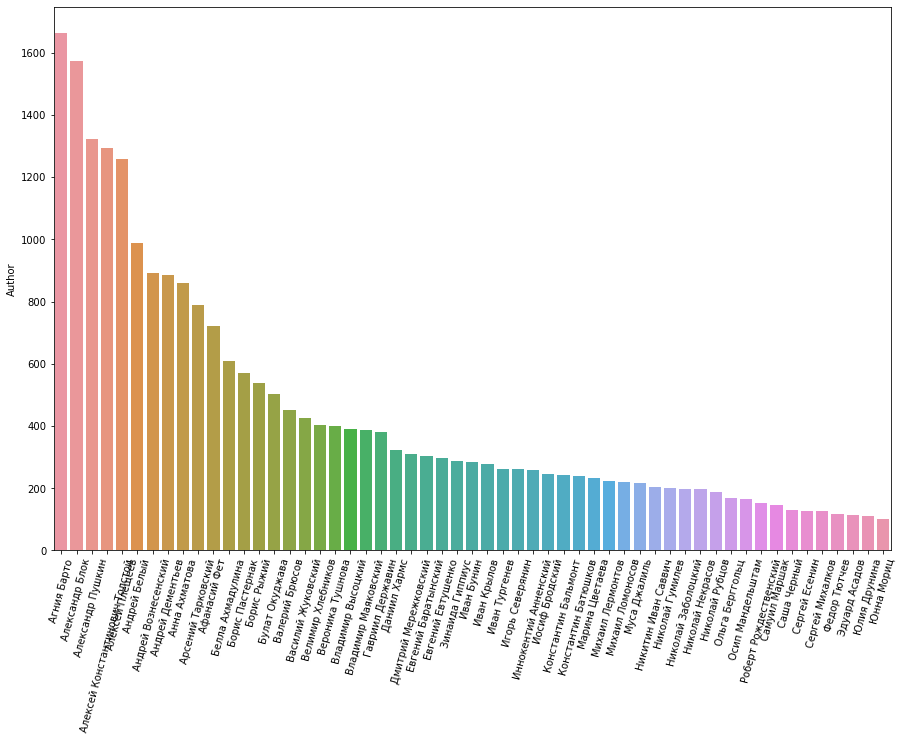

In [9]:
plt.figure(figsize=(15, 10))
seaborn.barplot(x=df['Author'].unique(), y=df['Author'].value_counts())
plt.xticks(rotation=75)
plt.show()

# Фильтруем данные. Выбираем только тех авторов, где есть более 850 стихотворений

In [10]:
pre_df = df['Author'].value_counts() > 850
valid_names = pre_df.index[:pre_df.values.sum()]
df = df.loc[df['Author'].isin(valid_names)].reset_index(drop=True)

In [11]:
df

,Text,Author
0,"Река раскинулась. Течет, грустит лениво\r\nИ м...",Александр Блок
1,"Никогда не забуду (он был, или не был,\r\nЭтот...",Александр Блок
2,"Мильоны — вас. Нас — тьмы, и тьмы, и тьмы.\r\n...",Александр Блок
3,Ты и во сне необычайна.\r\nТвоей одежды не кос...,Александр Блок
4,"Опять, как в годы золотые,\r\nТри стертых треп...",Александр Блок
...,...,...
10734,Осень. Деревья в аллее — как воины.\r\nКаждое ...,Марина Цветаева
10735,"Опустивши забрало,\r\nСо всем — в борьбе,\r\nУ...",Марина Цветаева
10736,Окно раскрыло створки —\r\nКак руки. Но скрест...,Марина Цветаева
10737,Уже богов — не те уже щедроты\r\nНа берегах — ...,Марина Цветаева


In [12]:
df.shape

(10739, 2)

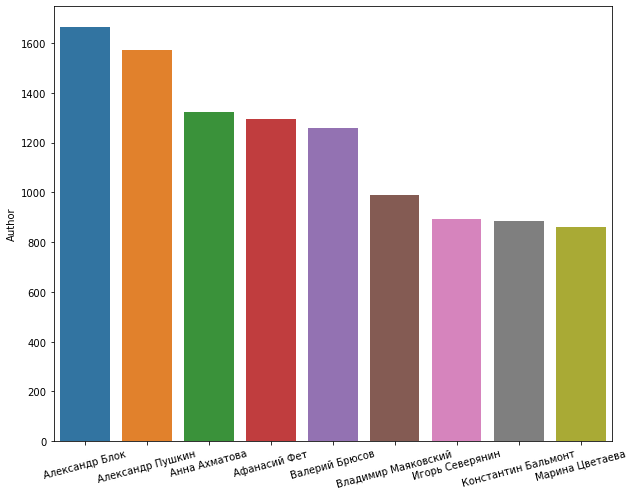

In [13]:
plt.figure(figsize=(10, 8))
seaborn.barplot(x=df['Author'].unique(), y=df['Author'].value_counts())
plt.xticks(rotation=15)
plt.show()

# Предобработка

In [14]:
import string


def remove_punctuation(text: str) -> str:
    return ''.join([ch if ch not in string.punctuation else ' ' for ch in text])


def remove_numbers(text: str) -> str:
    return ''.join([ch if not ch.isdigit() else ' ' for ch in text])


def remove_row(text: str)-> str:
    return text.replace(r'\r', '').replace(r'\n', '')

def remove_spaces(text: str) -> str:
    return re.sub(r'\s+', ' ', text, flags=re.I)

In [15]:
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['…', '«', '»', '...'])

In [16]:
def lemmatize_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords and token != " "]
    text = " ".join(tokens)
    return text

In [17]:
prep_text = [remove_spaces(remove_numbers(remove_row(remove_punctuation(text.lower())))) for text in tqdm(df['Text'])]

  0%|          | 0/10739 [00:00<?, ?it/s]

In [18]:
prep_text[0]

'река раскинулась течет грустит лениво и моет берега над скудной глиной желтого обрыва в степи грустят стога о русь моя жена моя до боли нам ясен долгий путь наш путь — стрелой татарской древней воли пронзил нам грудь наш путь — степной наш путь — в тоске безбрежной — в твоей тоске о русь и даже мглы — ночной и зарубежной — я не боюсь пусть ночь домчимся озарим кострами степную даль в степном дыму блеснет святое знамя и ханской сабли сталь… и вечный бой покой нам только снится сквозь кровь и пыль… летит летит степная кобылица и мнет ковыль… и нет конца мелькают версты кручи… останови идут идут испуганные тучи закат в крови закат в крови из сердца кровь струится плачь сердце плачь… покоя нет степная кобылица несется вскачь мы сам друг над степью в полночь стали не вернуться не взглянуть назад за непрядвой лебеди кричали и опять опять они кричат… на пути — горючий белый камень за рекой — поганая орда светлый стяг над нашими полками не взыграет больше никогда и к земле склонившись головою

In [19]:
df['lemma_text'] = prep_text

In [20]:
df

,Text,Author,lemma_text
0,"Река раскинулась. Течет, грустит лениво\r\nИ м...",Александр Блок,река раскинулась течет грустит лениво и моет б...
1,"Никогда не забуду (он был, или не был,\r\nЭтот...",Александр Блок,никогда не забуду он был или не был этот вечер...
2,"Мильоны — вас. Нас — тьмы, и тьмы, и тьмы.\r\n...",Александр Блок,мильоны — вас нас — тьмы и тьмы и тьмы попробу...
3,Ты и во сне необычайна.\r\nТвоей одежды не кос...,Александр Блок,ты и во сне необычайна твоей одежды не коснусь...
4,"Опять, как в годы золотые,\r\nТри стертых треп...",Александр Блок,опять как в годы золотые три стертых треплются...
...,...,...,...
10734,Осень. Деревья в аллее — как воины.\r\nКаждое ...,Марина Цветаева,осень деревья в аллее — как воины каждое дерев...
10735,"Опустивши забрало,\r\nСо всем — в борьбе,\r\nУ...",Марина Цветаева,опустивши забрало со всем — в борьбе у меня уж...
10736,Окно раскрыло створки —\r\nКак руки. Но скрест...,Марина Цветаева,окно раскрыло створки — как руки но скрестив с...
10737,Уже богов — не те уже щедроты\r\nНа берегах — ...,Марина Цветаева,уже богов — не те уже щедроты на берегах — не ...


# Стемминг

In [21]:
from nltk.stem.snowball import SnowballStemmer 
from nltk import word_tokenize
stemmer = SnowballStemmer("russian") 

In [22]:
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['…', '«', '»', '...', 'т.д.', 'т', 'д'])

In [23]:
text = df['lemma_text'][0]
word_tokenize(text)[:15]

['река',
 'раскинулась',
 'течет',
 'грустит',
 'лениво',
 'и',
 'моет',
 'берега',
 'над',
 'скудной',
 'глиной',
 'желтого',
 'обрыва',
 'в',
 'степи']

In [24]:
stemmed_texts_list = []
for text in tqdm(df['lemma_text']):
    tokens = word_tokenize(text)    
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in russian_stopwords]
    text = " ".join(stemmed_tokens)
    stemmed_texts_list.append(text)

  0%|          | 0/10739 [00:00<?, ?it/s]

In [25]:
df['stem_text'] = stemmed_texts_list

In [26]:
df

,Text,Author,lemma_text,stem_text
0,"Река раскинулась. Течет, грустит лениво\r\nИ м...",Александр Блок,река раскинулась течет грустит лениво и моет б...,рек раскинул течет груст ленив моет берег скуд...
1,"Никогда не забуду (он был, или не был,\r\nЭтот...",Александр Блок,никогда не забуду он был или не был этот вечер...,забуд вечер пожар зар сожж раздвинут бледн неб...
2,"Мильоны — вас. Нас — тьмы, и тьмы, и тьмы.\r\n...",Александр Блок,мильоны — вас нас — тьмы и тьмы и тьмы попробу...,мильон — — тьмы тьмы тьмы попроб сраз нам скиф...
3,Ты и во сне необычайна.\r\nТвоей одежды не кос...,Александр Блок,ты и во сне необычайна твоей одежды не коснусь...,сне необычайн тво одежд косн дремл — дремот та...
4,"Опять, как в годы золотые,\r\nТри стертых треп...",Александр Блок,опять как в годы золотые три стертых треплются...,год золот стерт треплют шле вязнут спиц распис...
...,...,...,...,...
10734,Осень. Деревья в аллее — как воины.\r\nКаждое ...,Марина Цветаева,осень деревья в аллее — как воины каждое дерев...,осен дерев алл — воин кажд дерев пахнет сво во...
10735,"Опустивши забрало,\r\nСо всем — в борьбе,\r\nУ...",Марина Цветаева,опустивши забрало со всем — в борьбе у меня уж...,опуст забра всем — борьб — мал улыбок — себе… ...
10736,Окно раскрыло створки —\r\nКак руки. Но скрест...,Марина Цветаева,окно раскрыло створки — как руки но скрестив с...,окн раскр створк — рук скрест сво — взира форт...
10737,Уже богов — не те уже щедроты\r\nНа берегах — ...,Марина Цветаева,уже богов — не те уже щедроты на берегах — не ...,бог — те щедрот берег — то рек широк закатн во...


In [27]:
def remove_stop_words(text):
    tokens = word_tokenize(text) 
    tokens = [token for token in tokens if token not in russian_stopwords and token != ' ']
    return " ".join(tokens)

In [29]:
sw_texts_list = []
for text in tqdm(df['lemma_text']):
    tokens = word_tokenize(text)    
    tokens = [token for token in tokens if token not in russian_stopwords and token != ' ']
    text = " ".join(tokens)
    sw_texts_list.append(text)

df['text_sw'] = sw_texts_list

  0%|          | 0/10739 [00:00<?, ?it/s]

In [31]:
df['text_sw'][0]

'река раскинулась течет грустит лениво моет берега скудной глиной желтого обрыва степи грустят стога русь жена боли нам ясен долгий путь наш путь — стрелой татарской древней воли пронзил нам грудь наш путь — степной наш путь — тоске безбрежной — твоей тоске русь мглы — ночной зарубежной — боюсь пусть ночь домчимся озарим кострами степную даль степном дыму блеснет святое знамя ханской сабли сталь… вечный бой покой нам снится сквозь кровь пыль… летит летит степная кобылица мнет ковыль… конца мелькают версты кручи… останови идут идут испуганные тучи закат крови закат крови сердца кровь струится плачь сердце плачь… покоя степная кобылица несется вскачь друг степью полночь стали вернуться взглянуть назад непрядвой лебеди кричали кричат… пути — горючий белый камень рекой — поганая орда светлый стяг нашими полками взыграет земле склонившись головою говорит друг остри свой меч недаром биться татарвою святое дело мертвым лечь — первый воин последний долго родина больна помяни раннею обедней мил

In [34]:
df['stem_text'][0]

'рек раскинул течет груст ленив моет берег скудн глин желт обрыв степ груст стог ру жен бол нам яс долг пут наш пут — стрел татарск древн вол пронз нам груд наш пут — степн наш пут — тоск безбрежн — тво тоск ру мглы — ночн зарубежн — бо пуст ноч домч озар костр степн дал степн дым блеснет свят знам ханск сабл сталь… вечн бо пок нам снит сквоз кров пыль… лет лет степн кобылиц мнет ковыль… конц мелька верст кручи… останов идут идут испуга туч закат кров закат кров сердц кров стру плач сердц плачь… поко степн кобылиц несет вскач друг степ полноч стал вернут взглянут назад непрядв лебед крича кричат… пут — горюч бел камен рек — поган орд светл стяг наш полк взыгра земл склон голов говор друг остр сво меч недар бит татарв свят дел мертв леч — перв воин последн долг родин больн помян ран обедн мил друг светл жен ноч мама залег орд степ мост темн пол тоб — знал дон темн зловещ сред ночн пол слыша тво голос сердц вещ крик лебед полун ’ чи туч вознос княжеск рат вдал вдал стрем бил голос мат че

# Лемматизация

In [42]:
lemm_texts_list = []
m = Mystem()
for text in tqdm(df['text_sw']):
    #print(text)
    try:
        text_lem = m.lemmatize(text)
        tokens = [token for token in text_lem if token != ' ' and token not in russian_stopwords]
        text = " ".join(tokens)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df['text_lemm'] = lemm_texts_list

Installing mystem to C:\Users\mailw/.local/bin\mystem.exe from http://download.cdn.yandex.net/mystem/mystem-3.1-win-64bit.zip


  0%|          | 0/10739 [00:00<?, ?it/s]

In [43]:
df

,Text,Author,lemma_text,stem_text,text_sw,text_lemm
0,"Река раскинулась. Течет, грустит лениво\r\nИ м...",Александр Блок,река раскинулась течет грустит лениво и моет б...,рек раскинул течет груст ленив моет берег скуд...,река раскинулась течет грустит лениво моет бер...,река раскидываться течь грустить лениво мыть б...
1,"Никогда не забуду (он был, или не был,\r\nЭтот...",Александр Блок,никогда не забуду он был или не был этот вечер...,забуд вечер пожар зар сожж раздвинут бледн неб...,забуду вечер пожаром зари сожжено раздвинуто б...,забывать вечер пожар заря сжигать раздвигать б...
2,"Мильоны — вас. Нас — тьмы, и тьмы, и тьмы.\r\n...",Александр Блок,мильоны — вас нас — тьмы и тьмы и тьмы попробу...,мильон — — тьмы тьмы тьмы попроб сраз нам скиф...,мильоны — — тьмы тьмы тьмы попробуйте сразитес...,мильон — — тьма тьма тьма попробовать сражат...
3,Ты и во сне необычайна.\r\nТвоей одежды не кос...,Александр Блок,ты и во сне необычайна твоей одежды не коснусь...,сне необычайн тво одежд косн дремл — дремот та...,сне необычайна твоей одежды коснусь дремлю — д...,сон необычайный твой одежда касаться дремать ...
4,"Опять, как в годы золотые,\r\nТри стертых треп...",Александр Блок,опять как в годы золотые три стертых треплются...,год золот стерт треплют шле вязнут спиц распис...,годы золотые стертых треплются шлеи вязнут спи...,год золотой стереть трепаться шлея вязнуть спи...
...,...,...,...,...,...,...
10734,Осень. Деревья в аллее — как воины.\r\nКаждое ...,Марина Цветаева,осень деревья в аллее — как воины каждое дерев...,осен дерев алл — воин кажд дерев пахнет сво во...,осень деревья аллее — воины каждое дерево пахн...,осень дерево аллея — воин каждый дерево пахн...
10735,"Опустивши забрало,\r\nСо всем — в борьбе,\r\nУ...",Марина Цветаева,опустивши забрало со всем — в борьбе у меня уж...,опуст забра всем — борьб — мал улыбок — себе… ...,опустивши забрало всем — борьбе — мало улыбок ...,опускать забрало весь — борьба — мало улыб...
10736,Окно раскрыло створки —\r\nКак руки. Но скрест...,Марина Цветаева,окно раскрыло створки — как руки но скрестив с...,окн раскр створк — рук скрест сво — взира форт...,окно раскрыло створки — руки скрестив свои — в...,окно раскрывать створка — рука скрещивать св...
10737,Уже богов — не те уже щедроты\r\nНа берегах — ...,Марина Цветаева,уже богов — не те уже щедроты на берегах — не ...,бог — те щедрот берег — то рек широк закатн во...,богов — те щедроты берегах — той реки широкие ...,бог — щедрота берег — река широкий закатны...


In [45]:
df.to_csv('lemma.csv', index=False)

# Обучение и подготовка данных

In [46]:
X = df['text_sw']
y = df['Author']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.05, random_state=42)

# Naive Bayes Classifier

In [64]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

In [66]:
nb.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [67]:
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

In [68]:
print(X_test.values[0], y_test.values[0], y_pred[0])

оползающая глыба — последних сил спасибо — рвущееся — умолчу — дуба юному плечу издыхающая рыба последних сил спасибо близящемуся — прости — силящемуся спасти валу первому прилива иссыхающая нива — божескому нелюдску бури чудному персту добры — час спасенья — силы первые — последним пока рот пересох — спаси — боги спаси — бог Марина Цветаева Марина Цветаева


In [69]:
my_tags = df['Author'].unique()
my_tags

array(['Александр Блок', 'Александр Пушкин', 'Анна Ахматова',
       'Афанасий Фет', 'Валерий Брюсов', 'Владимир Маяковский',
       'Игорь Северянин', 'Константин Бальмонт', 'Марина Цветаева'],
      dtype=object)

In [70]:
from sklearn.metrics import accuracy_score

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, target_names=my_tags))

accuracy 0.49162011173184356
                     precision    recall  f1-score   support

     Александр Блок       0.67      0.22      0.33        64
   Александр Пушкин       0.82      0.20      0.32        45
      Анна Ахматова       1.00      0.06      0.11        35
       Афанасий Фет       0.00      0.00      0.00        43
     Валерий Брюсов       0.31      1.00      0.47        94
Владимир Маяковский       1.00      0.89      0.94        66
    Игорь Северянин       0.55      0.84      0.66        74
Константин Бальмонт       1.00      0.04      0.08        47
    Марина Цветаева       0.92      0.32      0.47        69

           accuracy                           0.49       537
          macro avg       0.70      0.40      0.38       537
       weighted avg       0.67      0.49      0.43       537



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Linear Support Vector Machine

In [71]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])

In [72]:
%%time
sgd.fit(X_train, y_train)

Wall time: 2.5 s


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [73]:
y_pred = sgd.predict(X_test)

In [74]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7188081936685289
                     precision    recall  f1-score   support

     Александр Блок       0.71      0.50      0.59        64
   Александр Пушкин       0.80      0.82      0.81        45
      Анна Ахматова       0.75      0.43      0.55        35
       Афанасий Фет       0.83      0.44      0.58        43
     Валерий Брюсов       0.72      0.83      0.77        94
Владимир Маяковский       0.76      0.98      0.86        66
    Игорь Северянин       0.62      0.81      0.71        74
Константин Бальмонт       0.71      0.74      0.73        47
    Марина Цветаева       0.70      0.65      0.68        69

           accuracy                           0.72       537
          macro avg       0.73      0.69      0.70       537
       weighted avg       0.73      0.72      0.71       537



# Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])

In [76]:
%%time
logreg.fit(X_train, y_train)

Wall time: 37.1 s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0, n_jobs=1))])

In [77]:
y_pred = logreg.predict(X_test)

In [78]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7337057728119181
                     precision    recall  f1-score   support

     Александр Блок       0.66      0.64      0.65        64
   Александр Пушкин       0.79      0.76      0.77        45
      Анна Ахматова       0.78      0.60      0.68        35
       Афанасий Фет       0.69      0.51      0.59        43
     Валерий Брюсов       0.74      0.85      0.79        94
Владимир Маяковский       0.90      0.91      0.90        66
    Игорь Северянин       0.65      0.76      0.70        74
Константин Бальмонт       0.72      0.77      0.74        47
    Марина Цветаева       0.71      0.64      0.67        69

           accuracy                           0.73       537
          macro avg       0.74      0.71      0.72       537
       weighted avg       0.73      0.73      0.73       537



# Проверка на данных 

In [106]:
example_text = '''Поднялся шум; свирелью полевой
Оглашено мое уединенье,
И с образом любовницы драгой
Последнее слетело сновиденье.
С небес уже скатилась ночи тень.
Взошла заря, блистает бледный день —
А вкруг меня глухое запустенье...
Уж нет ее... я был у берегов,
Где милая ходила в вечер ясный;
На берегу, на зелени лугов
Я не нашел чуть видимых следов,
Оставленных ногой ее прекрасной.
Задумчиво бродя в глуши лесов,
Произносил я имя несравненной;
Я звал ее — и глас уединенный
Пустых долин позвал ее в дали.
'''

# Это Пушкин

example_text = remove_spaces(remove_numbers(remove_punctuation(example_text.lower())))
example_text = remove_stop_words(example_text)

example_text

mystem = Mystem()
def lemmatize_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords and token != " "]
    text = " ".join(tokens)
    return text


example_text = lemmatize_text(example_text)

example_text

logreg.predict([example_text])

array(['Александр Пушкин'], dtype=object)

# Save model

In [111]:
import pickle
pickle.dump(logreg, open('logistic.sav', 'wb'))
pickle.dump(sgd, open('svm.sav', 'wb'))

In [113]:
print(logreg.predict([example_text]),
logreg.predict_proba([example_text]))

['Александр Пушкин'] [[2.22490942e-01 7.73269029e-01 8.47181648e-05 1.83585826e-04
  2.09389800e-03 1.04709564e-07 1.09076209e-06 4.63162677e-05
  1.83031602e-03]]
